In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

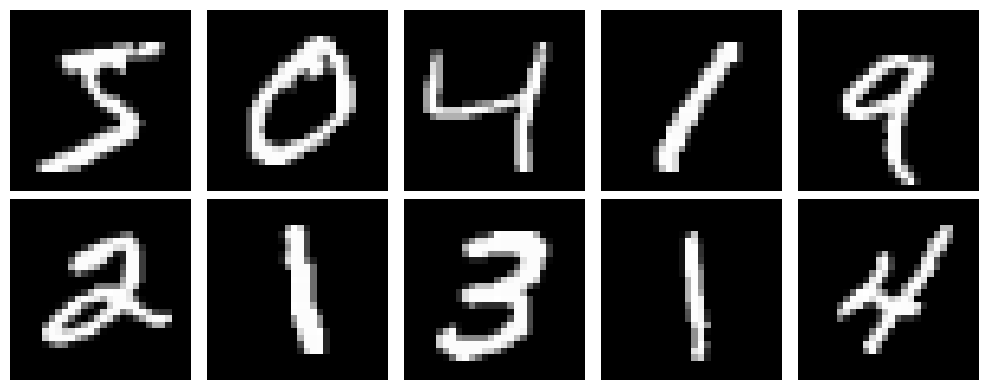

In [25]:
def plot_samples(data):
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap = "gray")
        ax.axis("off")
    fig.tight_layout()

plot_samples(x_train)

In [26]:
# plot_samples(x_train[50000])
x_train[50000].shape

(28, 28)

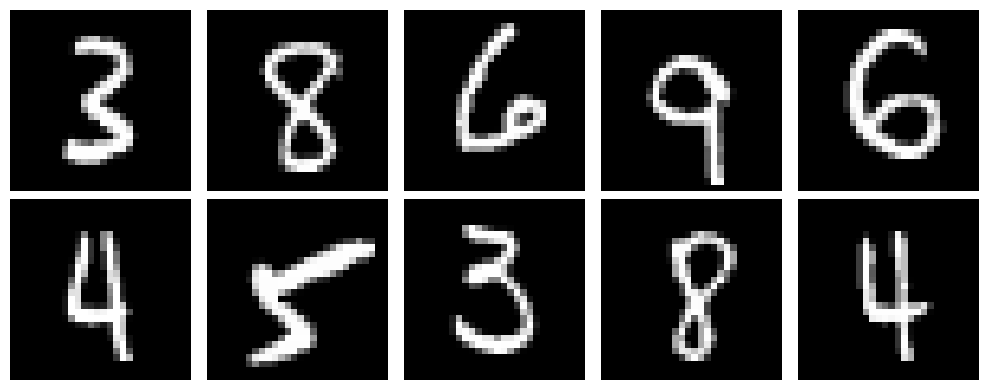

In [27]:
plot_samples(x_train[50000:50010])

In [28]:
X_train = x_train.astype("float32")/255
X_test = x_test.astype("float32")/255
X_train.min(), X_train.max()

(0.0, 1.0)

## Train|val|test split

In [29]:
from sklearn.model_selection import train_test_split

# We alrady have X_train: 60000 samples
# X_train_val: 50000 samples -> training part for validation and hyper parameter tuning
# X_val: 10000 samples -> validation used for hyperparameter tuning and validation loss curves
# Train on train_val and validate on val to hyperparameter tune, then when finished train on whole training data set
X_train_val, X_val, y_train_val, y_val = train_test_split(
    X_train, y_train, test_size=1/6, random_state=42
)

# rank 3
X_train_val.shape, X_val.shape

((50000, 28, 28), (10000, 28, 28))

In [30]:
# we will use ImageDataGenerator to augment our data
# it requires rank 4 e.g. (50000,28,28,3), (10000,28,28,1)
X_train_val[..., None].shape

(50000, 28, 28, 1)

In [31]:
X_train_val = X_train_val[..., None]
X_val = X_val[..., None]
X_train = X_train[..., None]
X_test = X_test[..., None]

X_train_val.shape

(50000, 28, 28, 1)

## Data augmentation

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

ImageDataGenerator()

In [33]:
train_image_generator = ImageDataGenerator(rotation_range=90)

# batch size 32 - used for mini-batch gradient descent - which gives us stochasticity in backpropagation
# flow is used for regenerating images after it has been exhausted
# this is because we will train in many epochs 
train_generator = train_image_generator.flow(X_train, y_train, batch_size=32)

train_generator

In [36]:
# 32 gray scaled images - this is the first batch
train_generator[0][0].shape

(32, 28, 28, 1)

In [37]:
train_generator[1][0].shape # 2nd batch

(32, 28, 28, 1)

In [38]:
train_generator[1][1].shape # labels for 2nd batch

(32,)

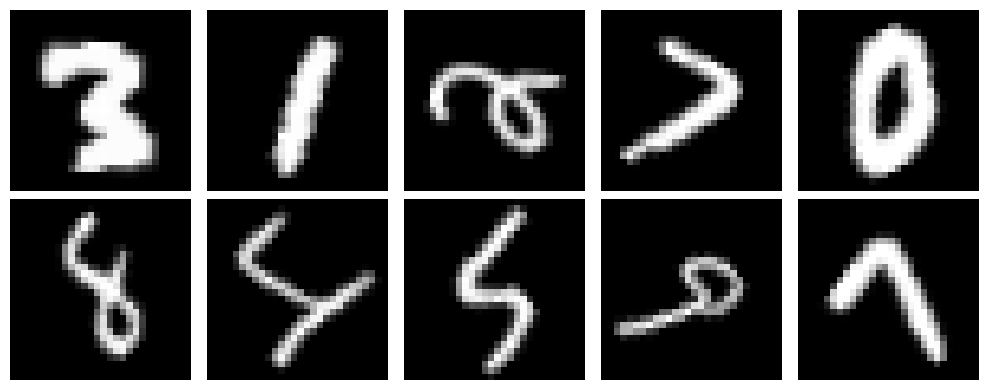

In [40]:
# illustrates what happens with up to 90* rotation
plot_samples(next(train_generator)[0])

## Make a good augmentation

In [ ]:
train_image_generator = ImageDataGenerator(
    rotation_range=10,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=False,
    height_shift_range=0.2,
    width_shift_range=0.2,
)

# don't augment test data and validation data - want to test on original data
# this is used for mini-batch in training
test_image_generator = ImageDataGenerator()

train_generator = train_image_generator.flow(X_train, y_train, batch_size=32)
train_val_generator = train_image_generator.flow(X_train_val, y_train_val, batch_size=32)
val_generator = test_image_generator.flow(X_val, y_val, batch_size=32)